In [20]:
import scipy.stats as stats
from scipy.stats import levene
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

In [21]:
os.getcwd()

'C:\\Users\\david\\Documents\\Data analysis'

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Descriptive Stats

<AxesSubplot:xlabel='MEDV'>

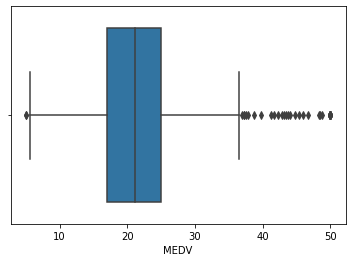

In [5]:
## Boxplot for median value of homes
sns.boxplot(x = boston_df['MEDV'])

Text(0.5, 1.0, 'Barplot for charles river dummy variable')

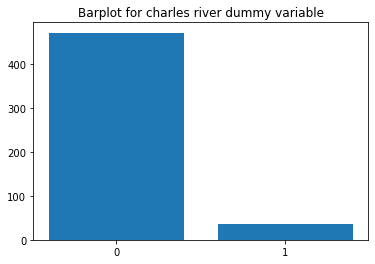

In [6]:
## Barplot for charles river dummy variable
CHAS = [str(int(boston_df['CHAS'][i])) for i in range(len(boston_df['CHAS']))]
boston_df['CHAS'] = CHAS
len(boston_df)
## insert code here
plt.bar(boston_df.CHAS.unique(), height = boston_df.CHAS.value_counts())
plt.title('Barplot for charles river dummy variable')

In [7]:
boston_df.loc[(boston_df['AGE']<=35),'age_groups'] = '35 and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'age_groups'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE']>=70),'age_groups'] = '70 and older'
boston_df.head(3)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_groups
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 and older
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70


<AxesSubplot:xlabel='age_groups', ylabel='MEDV'>

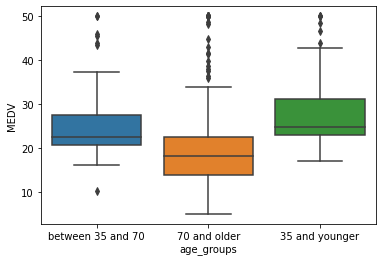

In [8]:
### Boxplot for MEDV by age group
sns.boxplot(y = boston_df['MEDV'], x = boston_df['age_groups'])

Text(0, 0.5, 'INDUS')

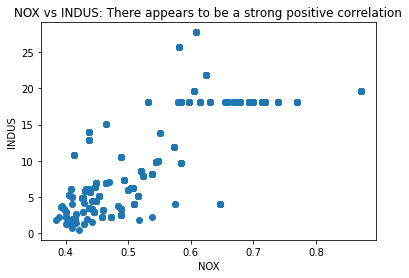

In [9]:
##Scatterplot Nitric oxide concentrations vs the proportion of non-retail business acres per town
plt.scatter(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('NOX vs INDUS: There appears to be a strong positive correlation')
plt.xlabel('NOX')
plt.ylabel('INDUS')

Text(0.5, 1.0, 'Histogram pupil-teacher ratio by town')

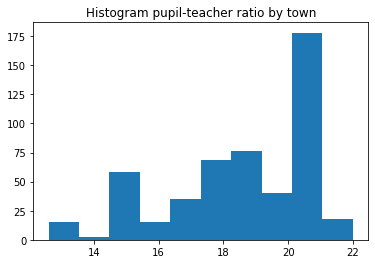

In [10]:
plt.hist(boston_df['PTRATIO'])
plt.title('Histogram pupil-teacher ratio by town')

#### Run statistical tests

##### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- H_0: There is no significant difference in the median values of houses whether or not they are bounded by Charles river
- H_a: - H_0: The median values of houses differ by whether or not they are bounded by Charles river

In [11]:
chas_1 = boston_df[boston_df['CHAS' ]=='1']['MEDV']
chas_0 = boston_df[boston_df['CHAS' ]=='0']['MEDV']

In [12]:
### Levene test for equal variances
levene(chas_1, chas_0)
## Since p-value is less than .05, reject the null hypothesis and assume unequal variances

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [13]:
stats.ttest_ind(a=chas_1, b=chas_0, equal_var=False)
## Since the p-value is less than .05, we reject the null hypothesis and conclude that there is a difference in median
## home values bounded by the Charles River

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

##### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- H_o: No difference is Median values regardless of proportion of owner occupied units built prior to 1940 (
- H_a: At least one of the proportions of owner occupied units built prior to 1940 has a different median house value

In [14]:
##Break PTRATIO into 3 groups to conduct ANOVA
ptratio_sort = sorted(boston_df['PTRATIO'].unique())
ptratio_33percentile = max(ptratio_sort[:int(len(ptratio_sort) * 0.33)])
ptratio_67percentile = max(ptratio_sort[:int(len(ptratio_sort) * 0.67)])

In [15]:
boston_df.loc[(boston_df['PTRATIO'] <= ptratio_33percentile), 'ptratio_groups'] = 'less than '+str(ptratio_33percentile)
boston_df.loc[(boston_df['PTRATIO'] > ptratio_33percentile) & (boston_df['PTRATIO'] < ptratio_67percentile), 'ptratio_groups'] = 'between '+str(ptratio_33percentile)+' and '+ str(ptratio_67percentile)
boston_df.loc[(boston_df['PTRATIO'] >= ptratio_67percentile), 'ptratio_groups'] = 'greater than '+str(ptratio_67percentile)

In [16]:
low = boston_df[boston_df['ptratio_groups'] == 'less than 16.1']['MEDV']
middle = boston_df[boston_df['ptratio_groups'] == 'between 16.1 and 18.5']['MEDV']
high = boston_df[boston_df['ptratio_groups'] == 'greater than 18.5']['MEDV']

In [17]:
### We reject the null hypothesis as the p-value is almost zero
stats.f_oneway(low, middle, high)

F_onewayResult(statistic=73.07868847557737, pvalue=1.3750676450286308e-28)

We reject the null hypothesis as the p-value is almost zero

##### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- H_o: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
- H_a: A relationship does exist between the two variables

In [18]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209154, 7.913361061236894e-98)

With a tiny p-vale below alpha, we can reject the null hypothesis and conclude that a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town exists

##### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
- H_o: THe additonal weighted distance does not have an impact on the median home value
- H_o: THe additonal weighted distance has an impact on the median home value

In [19]:
## insert code here
boston_df.head(3)
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        21:19:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The outputted model has a tiny p-value less than .05, suggesting that the weighted distance does have an effect on median home values. In addition, the coefficient and the R^2 value both suggest that this effect is positive